IMPORT PACKAGES

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud as WordCloud

IMPORTING DATASET

In [32]:
dataset = pd.read_csv("dataset.csv")
dataset['gender'] = dataset['gender'].map({'Male': 1, 'Female': 0})

In [33]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [34]:
dataset.head()

,age,gender,education,designation,experience,salary
0,32.0,1.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0.0,Master's,Data Analyst,3.0,65000.0
2,45.0,1.0,PhD,Senior Manager,15.0,150000.0
3,36.0,0.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1.0,Master's,Director,20.0,200000.0


In [35]:
print(x)

[[32.0 1.0 "Bachelor's" 'Software Engineer' 5.0]
 [28.0 0.0 "Master's" 'Data Analyst' 3.0]
 [45.0 1.0 'PhD' 'Senior Manager' 15.0]
 ...
 [nan 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [nan 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [nan 1.0 "Master's Degree" 'Sales Representative' 10.0]]


In [36]:
print(y)

[ 90000.  65000. 150000. ...  80000.  80000.  80000.]


HANDLING MISSING VALUES (NUMERIC)

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, [0,4]])

x[:, [0,4]] = imputer.transform(x[:, [0,4]])

In [38]:
print(x)

[[32.0 1.0 "Bachelor's" 'Software Engineer' 5.0]
 [28.0 0.0 "Master's" 'Data Analyst' 3.0]
 [45.0 1.0 'PhD' 'Senior Manager' 15.0]
 ...
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]]


HANDLING MISSING VALUES (TEXT)

In [39]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(x[:, [2,3]])

x[:, [2,3]] = imputer.transform(x[:, [2,3]])


In [40]:
print(x)

[[32.0 1.0 "Bachelor's" 'Software Engineer' 5.0]
 [28.0 0.0 "Master's" 'Data Analyst' 3.0]
 [45.0 1.0 'PhD' 'Senior Manager' 15.0]
 ...
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]]


HANDLING MISSING VALUES OF SALARY

In [41]:
# Assuming 'y' is a Pandas Series or a NumPy array
if not isinstance(y, pd.Series):
    y = pd.Series(y)

# Impute missing values with 0
y = y.fillna(0)

# Check if 'x' and 'y' have the same length
print(len(x))
print(len(y))

# Convert 'y' back to a NumPy array if necessary
y = np.array(y)

7399
7399


In [42]:
print(x)

[[32.0 1.0 "Bachelor's" 'Software Engineer' 5.0]
 [28.0 0.0 "Master's" 'Data Analyst' 3.0]
 [45.0 1.0 'PhD' 'Senior Manager' 15.0]
 ...
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]
 [33.62085944494181 1.0 "Master's Degree" 'Sales Representative' 10.0]]


ENCODING CATEGORICAL DATA

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False), [2,3])],
    remainder='passthrough'
)

x = np.array(ct.fit_transform(x))

In [44]:
print(x)

[[1.0 0.0 0.0 ... 32.0 1.0 5.0]
 [0.0 0.0 0.0 ... 28.0 0.0 3.0]
 [0.0 0.0 0.0 ... 45.0 1.0 15.0]
 ...
 [0.0 0.0 0.0 ... 33.62085944494181 1.0 10.0]
 [0.0 0.0 0.0 ... 33.62085944494181 1.0 10.0]
 [0.0 0.0 0.0 ... 33.62085944494181 1.0 10.0]]


OBSERVING OUTLIERS

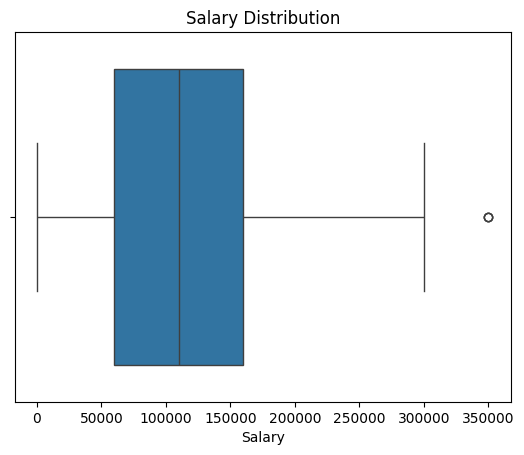

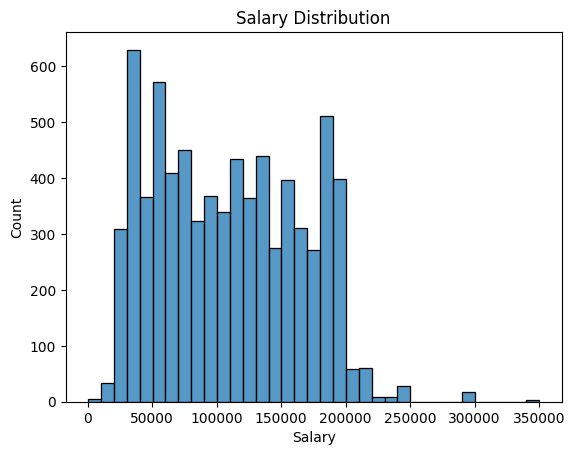

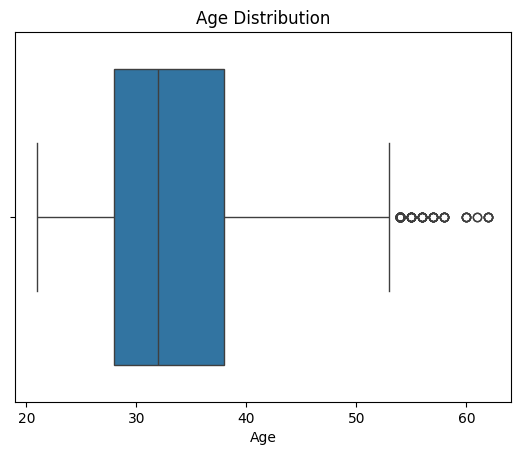

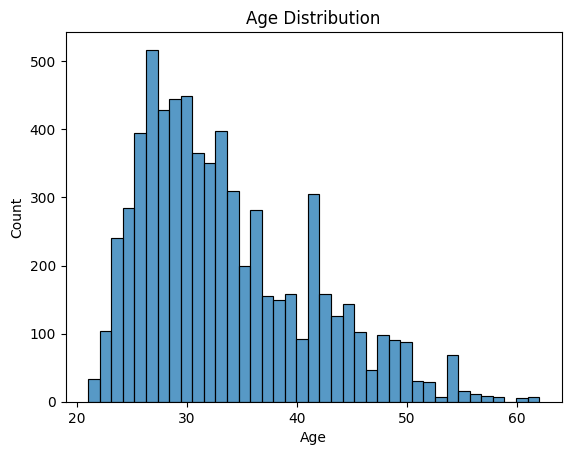

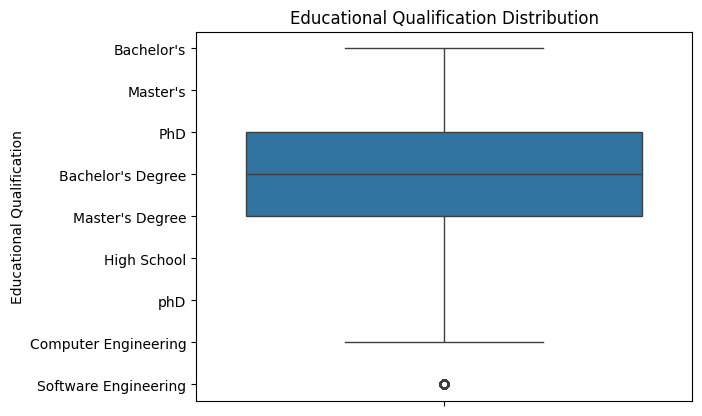

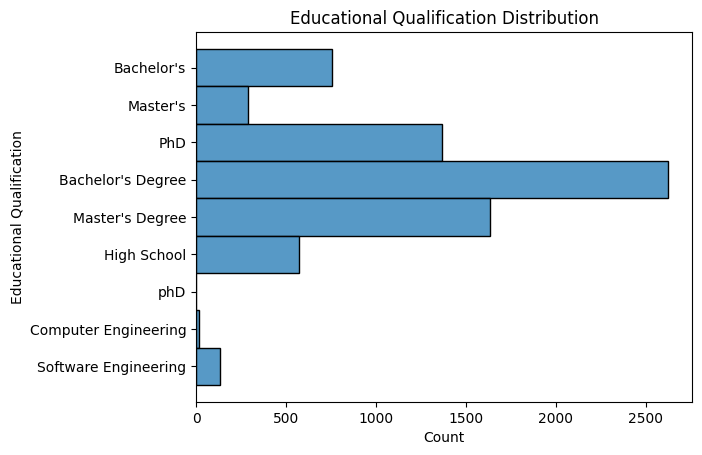

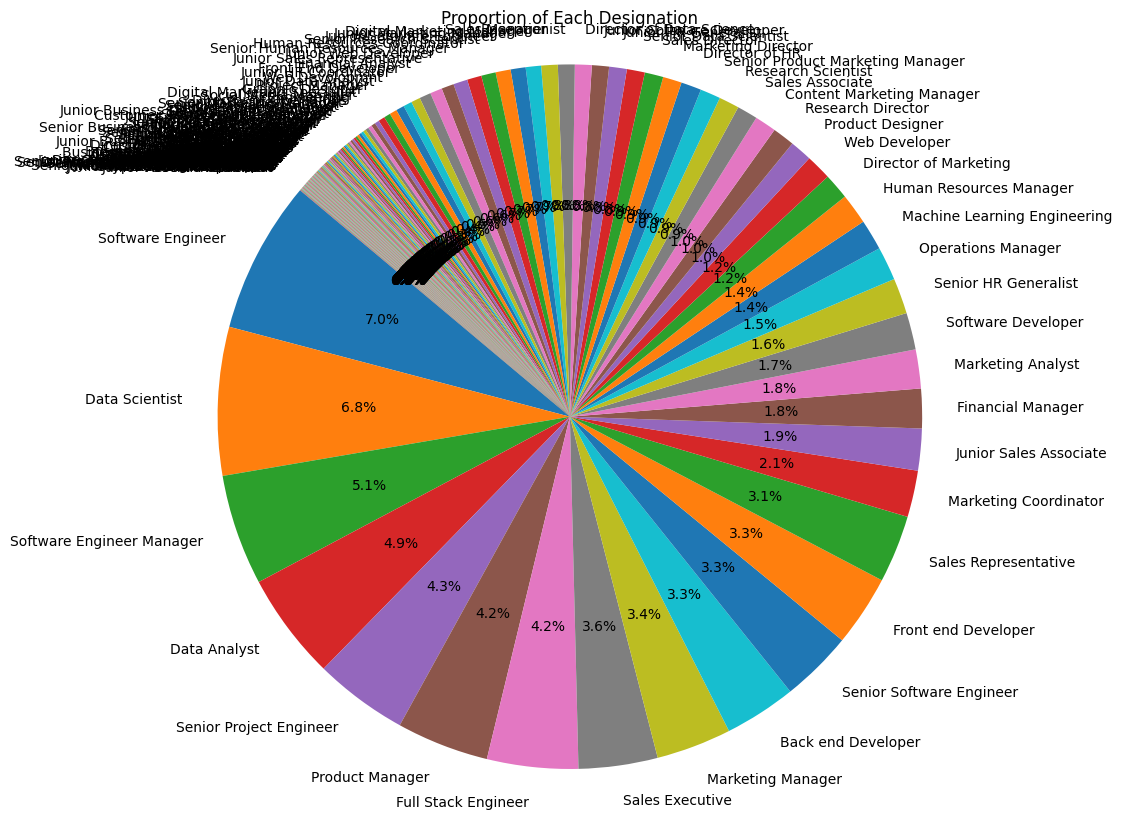

In [45]:
sns.boxplot(x=dataset['salary'])
plt.xlabel("Salary")
plt.title("Salary Distribution")
plt.show()

sns.histplot(x=dataset['salary'])
plt.xlabel("Salary")
plt.title("Salary Distribution")
plt.show()


sns.boxplot(x=dataset['age'])
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

sns.histplot(x=dataset['age'])
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

sns.boxplot(y=dataset['education'])
plt.ylabel('Educational Qualification')
plt.title("Educational Qualification Distribution")
plt.show()

sns.histplot(y=dataset['education'])
plt.ylabel('Educational Qualification')
plt.title("Educational Qualification Distribution")
plt.show()


designation_counts = dataset['designation'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(designation_counts, labels=designation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Designation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [46]:
Q1 = dataset['age'].quantile(0.25)
Q3 = dataset['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = dataset[(dataset['age'] < lower_bound) | (dataset['age'] > upper_bound)]
outliers

,age,gender,education,designation,experience,salary
1211,61.0,1.0,PhD,Software Engineer Manager,20.0,200000.0
1223,57.0,1.0,PhD,Software Engineer Manager,18.0,195000.0
1225,62.0,1.0,PhD,Software Engineer Manager,19.0,200000.0
1236,62.0,1.0,PhD,Software Engineer Manager,20.0,200000.0
1240,55.0,1.0,PhD,Software Engineer Manager,17.0,190000.0
...,...,...,...,...,...,...
3058,54.0,1.0,Master's Degree,Senior Software Engineer,32.0,195270.0
3067,54.0,1.0,Bachelor's Degree,Full Stack Engineer,25.0,179756.0
3084,54.0,0.0,PhD,Software Engineer Manager,32.0,191510.0
3104,54.0,1.0,PhD,Software Engineer Manager,30.0,184660.0


In [47]:
dataset = dataset[(dataset['age'] >= lower_bound) & (dataset['age'] <= upper_bound)]
dataset.shape

(6579, 6)

<Axes: xlabel='age'>

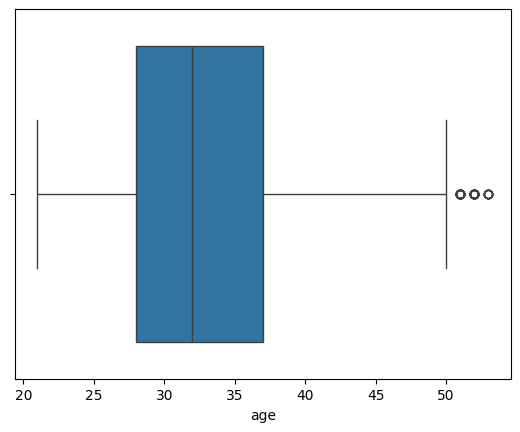

In [48]:
sns.boxplot(x=dataset['age'])

In [49]:
Q1 = dataset['salary'].quantile(0.25)
Q3 = dataset['salary'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = dataset[(dataset['salary'] < lower_bound) | (dataset['salary'] > upper_bound)]
outliers

,age,gender,education,designation,experience,salary


In [50]:
# Convert 'Education Level' to numerical representation if it contains ordered categories.
# For example, if it contains 'High School', 'Bachelor's', 'Master's', 'PhD',
# you can map them to numerical values like 1, 2, 3, 4.

# Create a dictionary mapping education levels to numerical values
# Define a mapping for standardization
education_mapping = {
    "bachelor's": 1,
    "bachelor's degree": 1,
    "master's":2,
    "master's degree": 2,
    "phd": 3,
    "ph.d": 3,
    "high school": 4,
    "computer engineering": 5,
    "software engineering": 6
}


# Apply the mapping to the 'Education Level' column
dataset['education (Numerical)'] = dataset['education'].map(education_mapping)

# Now calculate quantiles using the numerical column
Q1 = dataset['education (Numerical)'].quantile(0.25)
Q3 = dataset['education (Numerical)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = dataset[(dataset['education (Numerical)'] < lower_bound) | (dataset['education (Numerical)'] > upper_bound)]
outliers

,age,gender,education,designation,experience,salary,education (Numerical)


SPLITTING DATASET INTO TRAINING AND TEST SET

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

AS OF NOW, WE ARE SELECTING **LINEAR REGRESSION MODEL** AT OUR STARTING POINT.
THEN WE WILL DO WITH RANDOM FOREST



In [52]:
# # from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score
# from sklearn.preprocessing import StandardScaler




# imputer = SimpleImputer(strategy='mean')
# x_train = imputer.fit_transform(x_train)
# x_test = imputer.transform(x_test)


# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)




# # # 4. Create and train the Linear Regression model
# # model = LinearRegression()
# # model.fit(x_train, y_train)

# # # 5. Make predictions on the test set
# # y_pred = model.predict(x_test)

# # # 6. Evaluate the model
# # mse = mean_squared_error(y_test, y_pred)


# # Create and train the Random Forest model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(x_train, y_train)

# # 4. Make predictions on the test set
# y_pred = model.predict(x_test)

# # 5. Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('Mean Squared Error:', mse)

# print("The accuracy of our model is {}%".format(round(r2, 2) *100))


# # # 7. (Optional) Print the model's coefficients
# # print('Coefficients:', model.coef_)
# # print('Intercept:', model.intercept_)


# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

# # Calculate residuals
# residuals = y_test - y_pred

# # Create residual plot
# plt.scatter(y_pred, residuals)
# plt.xlabel("Predicted Values")
# plt.ylabel("Residuals")
# plt.title("Residual Plot")
# plt.axhline(y=0, color='r', linestyle='--')
# plt.show()

# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values (R-squared = {:.2f})".format(r2))
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r')  # Diagonal line
# plt.show()


In [53]:
import pandas as pd
import numpy as np

In [54]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# # Assuming you have already loaded and split your data into X_train, X_test, y_train, y_test





# # 3. Create and train the Gradient Boosting Regressor model
# model = GradientBoostingRegressor(n_estimators=100, random_state=42)
# model.fit(x_train, y_train)

# # 4. Make predictions on the test set
# y_pred = model.predict(x_test)

# # 5. Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('Mean Squared Error:', mse)
# print('R-squared:', r2)

# print("The R-squared value of our model is {:.2f}%".format(r2 * 100))

# # 6. (Optional) Print the model's feature importances
# print('Feature Importances:', model.feature_importances_)


Mean Squared Error: 166027043.92537788
R-squared: 0.9476298736897778
The R-squared value of our model is 94.76%
Feature Importances: [7.05562457e-02 2.43173633e-02 3.62987746e-03 4.72237691e-02
 8.73196498e-03 7.44700618e-03 1.72361732e-02 6.79349676e-02
 4.87912621e-04 1.36791747e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.04657675e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.31896390e-03 0.00000000e+00 0.00000000e+00
 7.42199458e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.77212109e-02 0.00000000e+00 4.86625582e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.99282098e-03 0.00000000e+00
 0.00000000e+00 1.53811630e-02 0.00000000e+00 0.00000000e+00
 4.98685474e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.54793719e-02 0.00000000e+00 6.42438419e-03 1.31937955e-02
 0.00000000e+

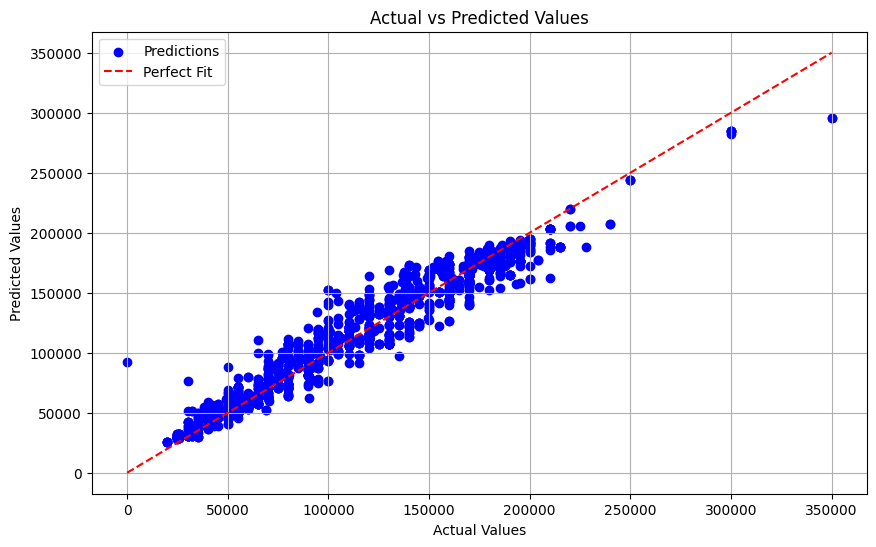

In [55]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# from google.colab import files

model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(x_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(x_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

print("The R-squared value of our model is {:.2f}%".format(r2 * 100))

# 6. (Optional) Print the model's feature importances
print('Feature Importances:', model.feature_importances_)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)


# 7. (Optional) Print the model's feature importances
print('Feature Importances:', model.feature_importances_)
# plt.savefig("Actual vs Predicted Values.png")
plt.show()
# from google.colab import files

# Download the saved file
# files.download("Actual vs Predicted Values.png")

In [56]:
# import pandas as pd
# import numpy as np
# import lightgbm as lgb
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from google.colab import files

# # 3. Create and train the LightGBM Regressor model
# model = lgb.LGBMRegressor(
#     n_estimators=500,                # Number of boosting rounds
#     learning_rate=0.05,              # Step size for each boosting step
#     num_leaves=31,                   # Maximum number of leaves in one tree
#     max_depth=-1,                    # Maximum depth of trees (-1 means no limit)
#     random_state=42,                # For reproducibility
# )
# model.fit(x_train, y_train)

# # 4. Make predictions on the test set
# y_pred = model.predict(x_test)

# # 5. Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('Mean Squared Error:', mse)
# print('R-squared:', r2)
# print("The R-squared value of our model is {:.2f}%".format(r2 * 100))

# # 6. Plot predictions vs actual values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, color='blue', label='Predictions')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.grid(True)
# plt.show()

# # 7. (Optional) Print the model's feature importances
# print('Feature Importances:', model.feature_importances_)

In [57]:
import joblib

# Save the trained model to a file
joblib.dump(model, "model.pkl")
print("Model saved as model.pkl")


Model saved as model.pkl
